# Loading of datasets and performing plotting and Goryacheva equation

In [1]:
# Classic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os


# ML Modules
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Other
from google.colab import files


# Creating pandas.Dataframe as dataset_pd and train_pd, valid_pd, test_pd

In [2]:
dataset_pd = pd.read_excel("/content/dataset_ml.xlsx")
cols = ["couple", "spec", "temp", "hard_ratio", "cof", "volume"]
dataset_pd.head()

,couple,spec,temp,hard_ratio,cof,volume
0,1,plate,300,0.899676,0.58,3.976732e+08
1,1,pin,300,0.899676,0.58,7.115535e+07
2,1,plate,700,0.899676,0.56,4.693081e+07
3,1,pin,700,0.899676,0.56,2.200536e+07
4,1,plate,850,0.899676,0.32,1.652195e+07


In [3]:
dataset_pd["spec"] = (dataset_pd["spec"]=="plate").astype(int)
dataset_pd.head()

,couple,spec,temp,hard_ratio,cof,volume
0,1,1,300,0.899676,0.58,3.976732e+08
1,1,0,300,0.899676,0.58,7.115535e+07
2,1,1,700,0.899676,0.56,4.693081e+07
3,1,0,700,0.899676,0.56,2.200536e+07
4,1,1,850,0.899676,0.32,1.652195e+07


In [4]:
train_pd, valid_pd, test_pd = np.split(dataset_pd.sample(frac=1), [int(0.6*len(dataset_pd)), int(0.8*len(dataset_pd))])
# train_pd, valid_pd, test_pd

# Creating numpy arrays of all version of dataset

In [5]:
dataset_np = np.array(dataset_pd)
# dataset_np

train_np, valid_np, test_np = np.array(train_pd), np.array(valid_pd), np.array(test_pd)
# train_np, valid_np, test_np

# Creating X_train, y_train... function

In [6]:
def get_xy(data):
    if isinstance(data, np.ndarray):
        X = data[:, :-1]
        y = data[:, -1].reshape(-1, 1)
    elif isinstance(data, pd.DataFrame):
        X = pd.DataFrame(data[data.columns[:-1]].values, columns = list(data.columns[:-1]) )
        y = pd.DataFrame(data[data.columns[-1]].values.reshape(-1, 1), columns = data.columns[-1:])
    else:
        raise ValueError("Input data must be either a pandas DataFrame or a numpy array")

    return X, y

# Pandas Dataframes and Numpy Arrays to Xy

In [7]:
#All PANDAS

X_dataset_pd = get_xy(dataset_pd)[0]
y_dataset_pd = get_xy(dataset_pd)[1]

X_train_pd = get_xy(train_pd)[0]
y_train_pd = get_xy(train_pd)[1]

X_valid_pd = get_xy(valid_pd)[0]
y_valid_pd = get_xy(valid_pd)[1]

X_test_pd = get_xy(test_pd)[0]
y_test_pd = get_xy(test_pd)[1]

#All NUMPY ARRAYS

X_dataset_np = get_xy(dataset_np)[0]
y_dataset_np = get_xy(dataset_np)[1]

X_train_np = get_xy(train_np)[0]
y_train_np = get_xy(train_np)[1]

X_valid_np = get_xy(valid_np)[0]
y_valid_np = get_xy(valid_np)[1]

X_test_np = get_xy(test_np)[0]
y_test_np = get_xy(test_np)[1]

# Plot settings

In [8]:
download_plot = False

In [9]:
def cm_to_inch(cm):
  inch = 0.3937 * cm
  return inch

# Wear - temp plot

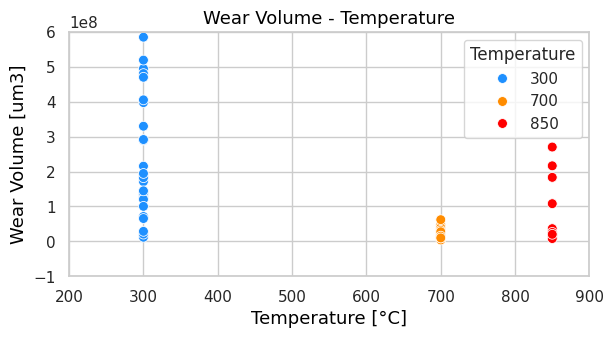

In [10]:
#Set basic SNS Theme
sns.set_theme(style="whitegrid")

#Load dataset, set colors to temps
dataset_pd["temp_str"] = dataset_pd["temp"].astype(str)
color_map = {"300": "dodgerblue", "700": "darkorange", "850": "red"}

#Set figsize
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

#Create scatterplot with hue
sns.scatterplot(dataset_pd,x=dataset_pd["temp"], y=dataset_pd["volume"], hue=(dataset_pd["temp_str"]),marker="o",s=50, palette = color_map)

#Title, legend, x and y params
font_size = 13
font_color = "black"
plt.title("Wear Volume - Temperature", fontsize = font_size, color = font_color)
plt.legend(title="Temperature")

plt.xlim(200,900)
# plt.xticks()
plt.xlabel("Temperature [°C]", fontsize = font_size, color = font_color)

plt.ylim(-1e8,6e8)
# plt.yticks()
plt.ylabel("Wear Volume [um3]", fontsize = font_size, color = font_color)

# Coloring the spines along the plot and setting the grid color
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['left'].set_color('black')
# plt.grid(color='black')

#Fit to figsize
plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"wear_temp.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

# CoF - Temp plot

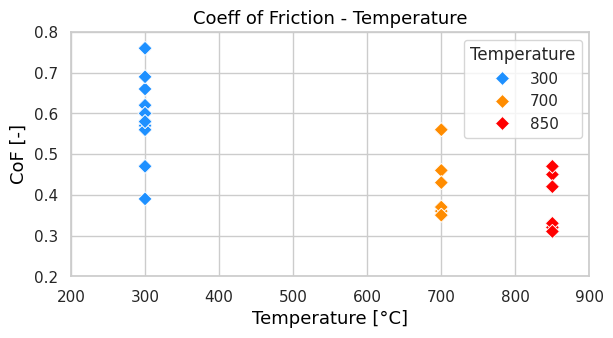

In [11]:
#Set basic SNS Theme
sns.set_theme(style="whitegrid")

#Load dataset, set colors to temps
dataset_pd["temp_str"] = dataset_pd["temp"].astype(str)
color_map = {"300": "dodgerblue", "700": "darkorange", "850": "red"}

#Set figsize
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

#Create scatterplot with hue
sns.scatterplot(dataset_pd,x=dataset_pd["temp"], y=dataset_pd["cof"], hue=(dataset_pd["temp_str"]),marker="D",s=50, palette = color_map)

#Title, legend, x and y params
font_size = 13
font_color = "black"
plt.title("Coeff of Friction - Temperature", fontsize = font_size, color = font_color)
plt.legend(title="Temperature")

plt.xlim(200,900)
# plt.xticks()
plt.xlabel("Temperature [°C]", fontsize = font_size, color = font_color)

plt.ylim(0.2,0.8)
# plt.yticks()
plt.ylabel("CoF [-]", fontsize = font_size, color = font_color)

# Coloring the spines along the plot and setting the grid color
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['left'].set_color('black')
# plt.grid(color='black')

#Fit to figsize
plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"cof_temp.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

#Wear volume - CoF plot

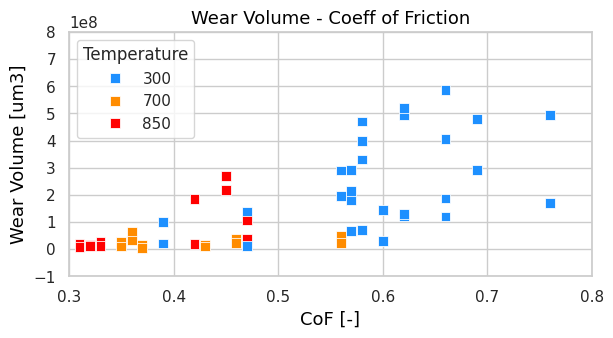

In [12]:
#Set basic SNS Theme
sns.set_theme(style="whitegrid")

#Load dataset, set colors to temps
dataset_pd["temp_str"] = dataset_pd["temp"].astype(str)
color_map = {"300": "dodgerblue", "700": "darkorange", "850": "red"}

#Set figsize
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

#Create scatterplot with hue
sns.scatterplot(dataset_pd,x=dataset_pd["cof"], y=dataset_pd["volume"], hue=(dataset_pd["temp_str"]),marker="s",s=50, palette = color_map)

#Title, legend, x and y params
font_size = 13
font_color = "black"
plt.title("Wear Volume - Coeff of Friction", fontsize = font_size, color = font_color)
plt.legend(title="Temperature")

plt.xlim(0.3,0.8)
# plt.xticks()
plt.xlabel("CoF [-]", fontsize = font_size, color = font_color)

plt.ylim(-1e8,8e8)
plt.yticks(range(int(-1e8), int(9e8), int(1e8)))
plt.ylabel("Wear Volume [um3]", fontsize = font_size, color = font_color)

# Coloring the spines along the plot and setting the grid color
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['left'].set_color('black')
# plt.grid(color='black')

#Fit to figsize
plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"wear_cof.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

# Wear Volume - Material Couple

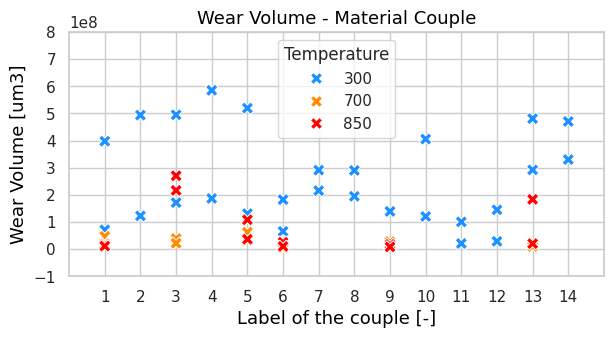

In [13]:
#Set basic SNS Theme
sns.set_theme(style="whitegrid")

#Load dataset, set colors to temps
dataset_pd["temp_str"] = dataset_pd["temp"].astype(str)
color_map = {"300": "dodgerblue", "700": "darkorange", "850": "red"}

#Set figsize
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

#Create scatterplot with hue
sns.scatterplot(dataset_pd,x=dataset_pd["couple"], y=dataset_pd["volume"], hue=(dataset_pd["temp_str"]),marker="X",s=80, palette = color_map)

#Title, legend, x and y params
font_size = 13
font_color = "black"
plt.title("Wear Volume - Material Couple", fontsize = font_size, color = font_color)
plt.legend(title="Temperature")
# loc='upper right'

plt.xlim(0,15)
plt.xticks(range(1, 15))
plt.xlabel("Label of the couple [-]", fontsize = font_size, color = font_color)

plt.ylim(-1e8,8e8)
plt.yticks(range(int(-1e8), int(9e8), int(1e8)))
plt.ylabel("Wear Volume [um3]", fontsize = font_size, color = font_color)

# Coloring the spines along the plot and setting the grid color
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['left'].set_color('black')
# plt.grid(color='black')

#Fit to figsize
plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"wear_couple.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

# LINEAR = ALFA = BETA = 1: Wear coefficient K - Wear Volume

In [14]:
p = 4000
v = 0.04
t = 7200
alfa_lin = 1
beta_lin = 1

cubic_conversion_factor =  1e18 #Converts um3 to m3

K_values_lin = ((y_dataset_np/cubic_conversion_factor) / ((p**alfa_lin)*(v**beta_lin)*t))
K_lin = pd.DataFrame(K_values_lin, columns = ["K"])

VK_lin = pd.concat([y_dataset_pd, K_lin], axis=1)

# POLYNOMIAL: ALFA = BETA = 1e20 Wear coefficient K - Wear Volume

In [15]:
p = 4000
v = 0.04
t = 7200
alfa_pol = 1e-20
beta_pol = 1e-20
cubic_conversion_factor =  1e18 #Converts um3 to m3

K_values_pol = ((y_dataset_np/cubic_conversion_factor) / ((p**alfa_pol)*(v**beta_pol)*t))
K_pol = pd.DataFrame(K_values_pol, columns = ["K"])

V_pol = y_dataset_pd
VK_pol = pd.concat([V_pol, K_pol], axis=1)

#Combo for Alfa=Beta=1 and 1e-20

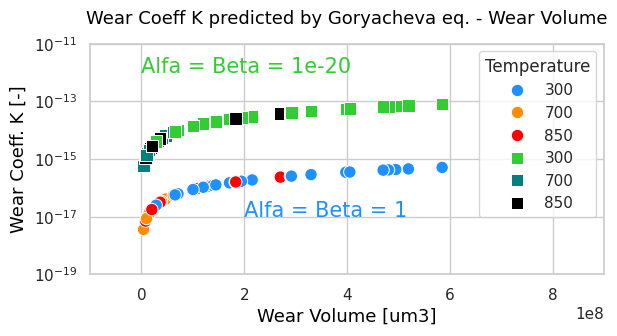

In [16]:
#Set basic SNS Theme
sns.set_theme(style="whitegrid")

#Set colors to temps
dataset_pd["temp_str"] = dataset_pd["temp"].astype(str)
color_map_lin = {"300": "dodgerblue", "700": "darkorange", "850": "red"}
color_map_pol = {"300": "limegreen", "700": "teal", "850": "black"}

#Set figsize
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

#Load dataset, Create scatterplot with hue
# sns.scatterplot(dataset_pd,x=dataset_pd["couple"], y=dataset_pd["volume"], hue=(dataset_pd["temp_str"]),marker="X",s=80, palette = color_map)
sns.scatterplot(VK_lin, x=VK_lin["volume"], y=VK_lin["K"], hue = (dataset_pd["temp_str"]), marker="o", s=80, palette = color_map_lin)
sns.scatterplot(VK_pol, x=VK_pol["volume"], y=VK_pol["K"], hue = (dataset_pd["temp_str"]), marker="s", s=80, palette = color_map_pol)

plt.text(2e8, 1e-17, "Alfa = Beta = 1", fontsize=15, color='dodgerblue')
plt.text(1, 1e-12, "Alfa = Beta = 1e-20", fontsize=15, color='limegreen')

#Title, legend, x and y params
font_size = 13
font_color = "black"
plt.title("Wear Coeff K predicted by Goryacheva eq. - Wear Volume", fontsize = font_size, color = font_color, y=1.05, loc='Center')
plt.legend(title="Temperature")
# loc='upper right'

plt.xlim(-1e8,9e8)
# plt.xticks(range(1, 15))
# plt.xscale("log")
plt.xlabel("Wear Volume [um3]", fontsize = font_size, color = font_color)

plt.ylim(1e-19,1e-11)
# plt.yticks(range(int(-1e8), int(9e8), int(1e8)))
plt.yscale("log")
plt.ylabel("Wear Coeff. K [-]", fontsize = font_size, color = font_color)

# Coloring the spines along the plot and setting the grid color
# plt.gca().spines['bottom'].set_color('black')
# plt.gca().spines['top'].set_color('black')
# plt.gca().spines['right'].set_color('black')
# plt.gca().spines['left'].set_color('black')
# plt.grid(color='black')

#Fit to figsize
plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"kv_mix_plot.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

#3D Alfa - Beta - K

In [17]:
p = 4000
v = 0.04
t = 7200
cubic_conversion_factor =  1e18 #Converts um3 to m3
list_size = 21
logspace_elems = 500
V_avg = (np.mean(y_dataset_np)) / cubic_conversion_factor

alfa_list = np.logspace(1e-25, -(list_size), logspace_elems)
beta_list= np.logspace(1e-25, -(list_size), logspace_elems)

A, B = np.meshgrid(alfa_list, beta_list)
K = (V_avg / ((p**A)*(v**B)*t))

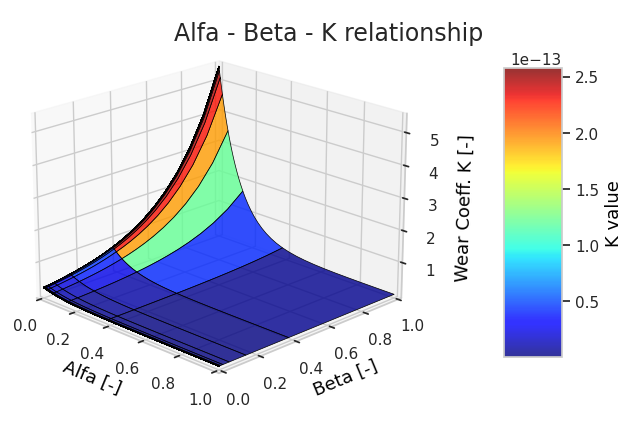

In [18]:
fig = plt.figure(figsize=((7.5),7.5))
font_size = 13
font_color = "black"

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, K, cmap=cm.jet, linewidth=0.5, antialiased=True, shade=False, alpha = 0.8, edgecolors='black')

ax.set_xlabel('Alfa [-]', color = font_color, fontsize = font_size)
ax.set_xlim(1e-25,1)
# ax.set_xscale('log')

ax.set_ylabel('Beta [-]', color = font_color, fontsize = font_size)
ax.set_ylim(1e-25,1)
# ax.set_yscale('log')

ax.set_zlabel('Wear Coeff. K [-]', color = font_color, fontsize = font_size)
# ax.set_zlim(1e-14, 1e-16)
# ax.set_zscale('log')

plt.suptitle('Alfa - Beta - K relationship', fontsize=17, x=0.55, y=0.75)

cbar = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
cbar.set_label('K value', color = font_color, fontsize = font_size)

ax.view_init(elev=20, azim=-45)

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"3d_plot.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False

# K convergence

In [19]:
K_avg_list = []
for i in range(K.shape[1]):
  column_values = K[:, i]
  K_avg_list.append(list(column_values))
# K_avg_list

In [20]:
K_avg = []
for j in range(K.shape[0]):
  K_avg_i = (sum(K_avg_list[j]))/len(K_avg_list[j])
  K_avg.append(K_avg_i)
print(K_avg)

[6.704506012663524e-18, 1.4422363911062512e-17, 2.89056192097181e-17, 5.433025947788785e-17, 9.633639893269699e-17, 1.6201893013917034e-16, 2.597105192595771e-16, 3.9855430526134893e-16, 5.879055418569199e-16, 8.366352549429063e-16, 1.1524266171067746e-15, 1.5411534313732072e-15, 2.006412448301365e-15, 2.549253310107239e-15, 3.16811892850092e-15, 3.858981309357261e-15, 4.615637325603902e-15, 5.430117350257562e-15, 6.293156578203575e-15, 7.19468254018985e-15, 8.124280424309093e-15, 9.071608078248145e-15, 1.0026743086697186e-14, 1.098045378830106e-14, 1.1924393770226726e-14, 1.2851224984392825e-14, 1.3754678235878416e-14, 1.4629561675282593e-14, 1.5471728452111647e-14, 1.6278014239611643e-14, 1.704615427113012e-14, 1.7774688121100222e-14, 1.8462858937961186e-14, 1.911051234400186e-14, 1.9717998854429128e-14, 2.0286082486894344e-14, 2.081585725289635e-14, 2.1308672441500346e-14, 2.1766067007673164e-14, 2.2189712938997218e-14, 2.2581367169598383e-14, 2.2942831413093592e-14, 2.3275919173511

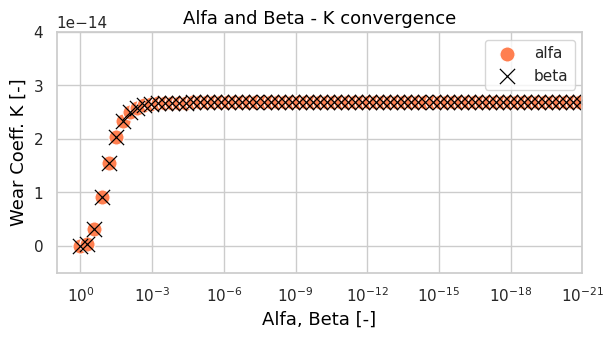

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(cm_to_inch(16), cm_to_inch(9)))

point = 7
ax1 = sns.scatterplot(x=alfa_list[::point], y=K_avg[::point], marker="o",s=120, color = "coral", label = "alfa")
ax2 = sns.scatterplot(x=beta_list[::point], y=K_avg[::point], marker="x",s=120, color = "black", label = "beta")

font_size = 13
font_color = "black"
plt.title("Alfa and Beta - K convergence", fontsize = font_size, color = font_color)

plt.xlim(10,1e-21)
plt.xlabel("Alfa, Beta [-]", fontsize = font_size, color = font_color)
plt.xscale('log')

plt.ylim(-0.5e-14,4e-14)
plt.ylabel("Wear Coeff. K [-]", fontsize = font_size, color = font_color)
plt.legend()

plt.tight_layout()

# download_plot = True

if download_plot == True:
  file_format = "svg"
  file_path =  f"convergence_plot.{file_format}"
  plt.savefig(file_path)
  files.download(file_path)
  print(f"Plot downloaded successfully at Desktop/{file_path}")

plt.show()

download_plot = False